# Завдання


* Створіть xls-документ, що містить дані про міста, їх населення, середній дохід жителів, площу території та наявність метрополітену. Кількість записів у документі – 20.

* За допомогою Plotly візуалізуйте залежності населення міста від його площі та середнього доходу від населення. Помістіть ці графіки на один малюнок.

* Побудуйте матрицю кореляцій та візуалізуйте її через heatmap.

* Побудуйте звіти про таблицю за допомогою Sweetviz та Pandas Profiling; напишіть коротке порівняння цих звітів.

In [46]:
import pandas as pd


#### 1. Створення датафрейму з xls-документу:

In [47]:

df = pd.read_excel('cities.xlsx', index_col=0)
df

,city,population,income,area,subway
1,Kyiv,2967360,15150,840,yes
2,Dnipro,990724,14500,405,yes
3,Odesa,1017699,13000,240,no
4,Kharkiv,1443207,13500,310,yes
5,Zaporizhhia,731922,14400,330,no
6,Lviv,724314,12900,170,no
7,Mykolaiv,480080,14300,260,no
8,Vinnytsia,370707,12600,110,no
9,Kherson,286958,11700,150,no
10,Chernihiv,286899,11800,80,no


#### 2. Візуалізація залежностей за допомогою Plotly:

In [48]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [49]:
fig = make_subplots(rows = 1, cols = 2, subplot_titles = ('Population vs Area', 'Income vs Population'))
fig.add_trace(go.Scatter(x = df['population'], y = df['area']), row = 1, col = 1)
fig.add_trace(go.Scatter(x = df['income'], y = df['population']), row = 1, col = 2)
fig.update_layout(height = 600, width = 800, title = "Subplot 1")
fig.show()

In [50]:

fig = make_subplots(rows = 4, cols = 1)
fig.add_scatter(y = df['population'], row = 1, col = 1)
fig.add_scatter(y = df['area'], row = 2, col = 1)
fig.add_scatter(y = df['income'], row = 3, col = 1)
fig.add_scatter(y = df['population'], row = 4, col = 1)
fig.update_layout(height=600, width=800, title_text='Subplot 2')
fig.show()



#### 3.Побудова матриці кореляцій та візуалізація її через Heatmap.

In [51]:
import plotly.graph_objects as go

In [52]:

fig = go.Figure()
data_corr = df.corr()
fig.add_trace(go.Heatmap(x = data_corr.columns, y = data_corr.index, z = data_corr))
fig.show()


 #### 4.Побудова звітів про таблицю за допомогою Pandas Profiling та Sweetviz. Коротке порівння цих звітів
   

In [53]:
from ydata_profiling import ProfileReport

In [54]:
profile = ProfileReport(df)
print('ProfileReport')
profile.to_notebook_iframe()

ProfileReport


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [55]:
import sweetviz as sv

                                             |                                             | [  0%]   00:00 ->…

Sweetviz



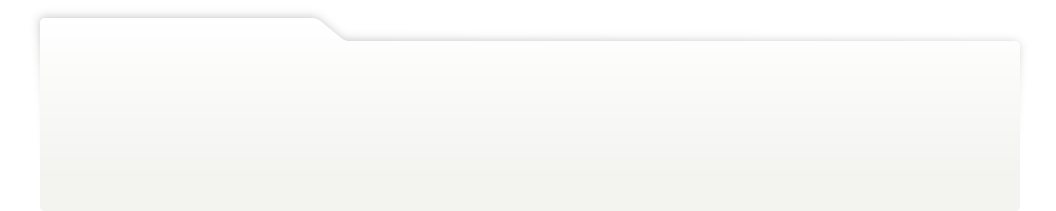
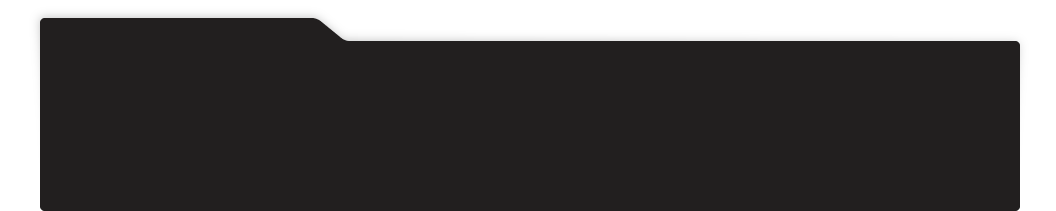
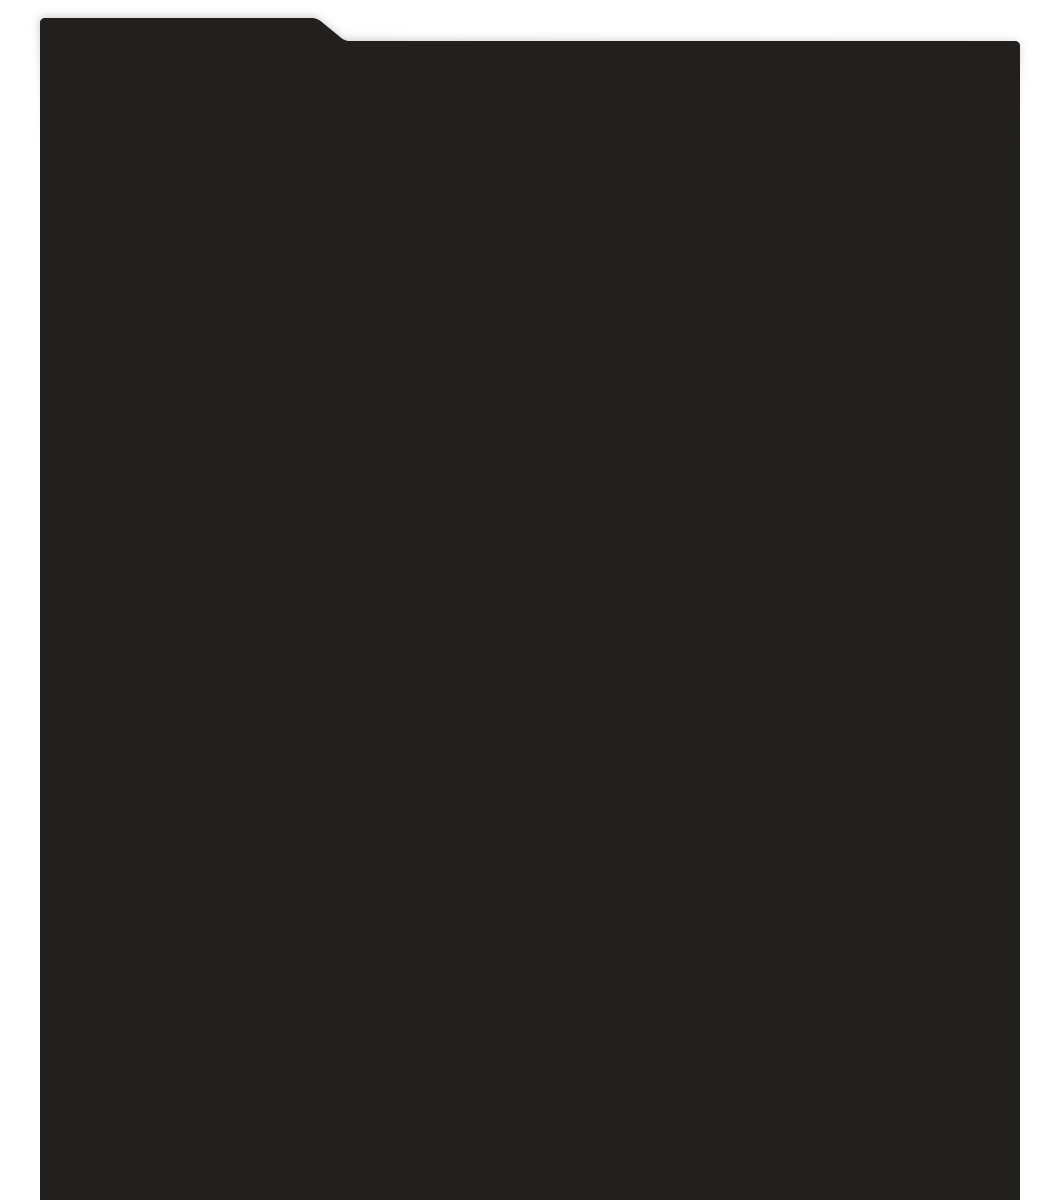
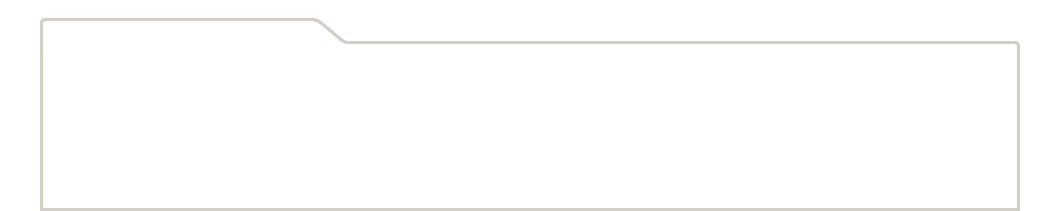
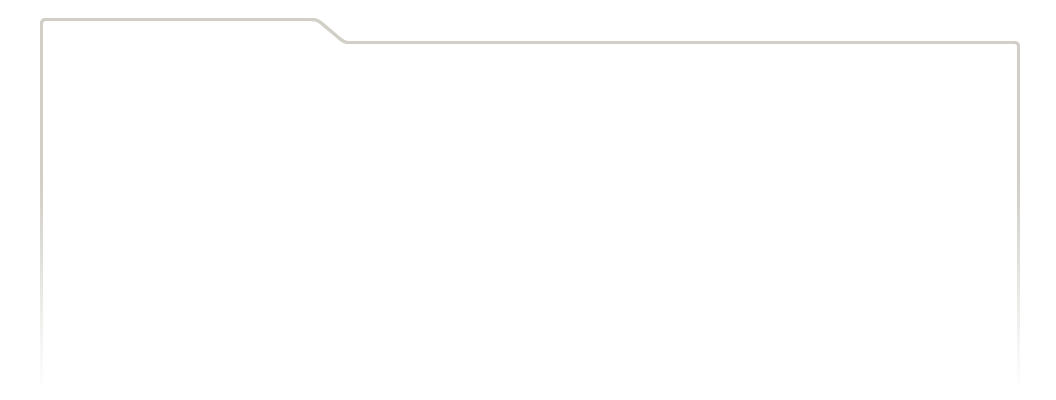
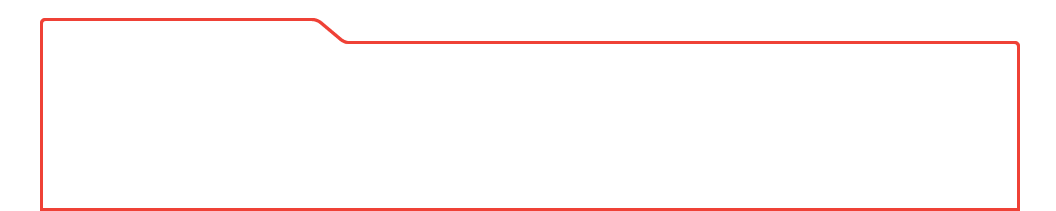
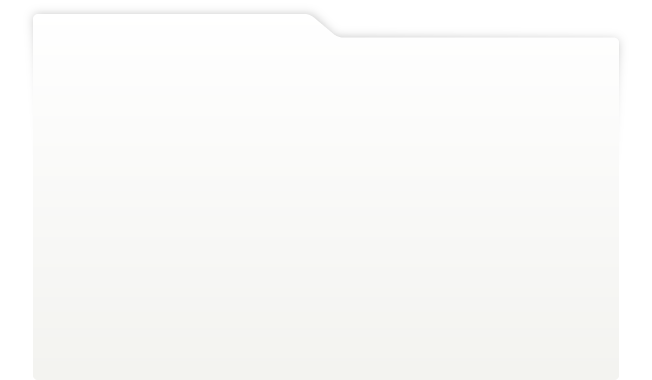
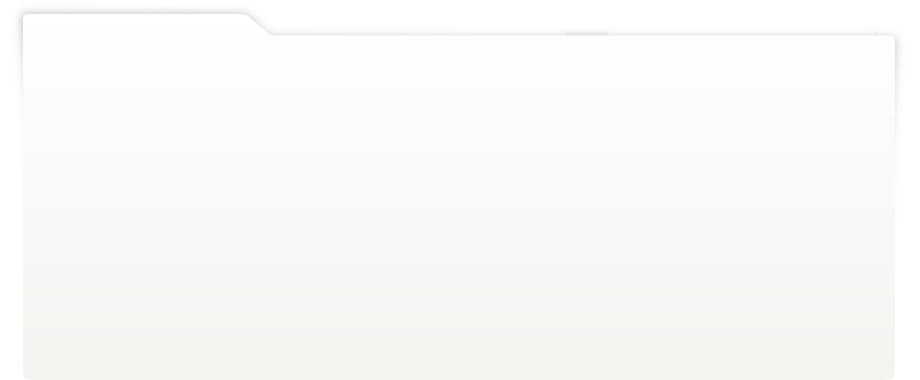
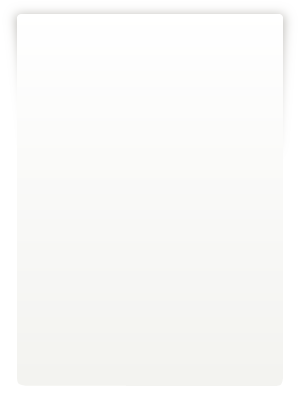
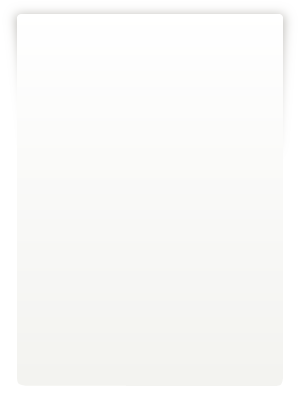
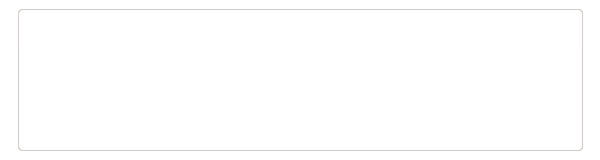
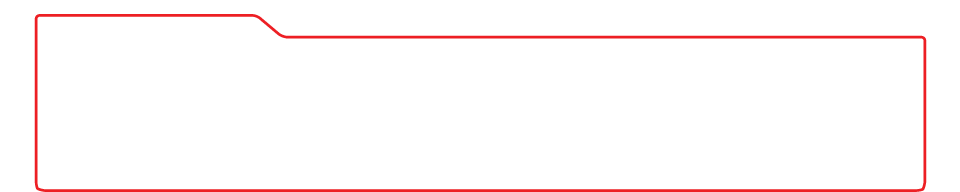
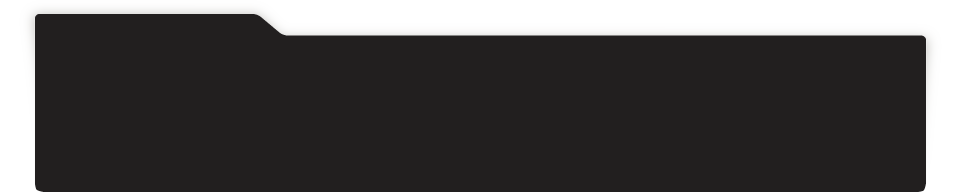
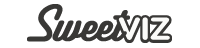
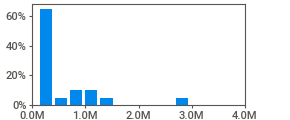
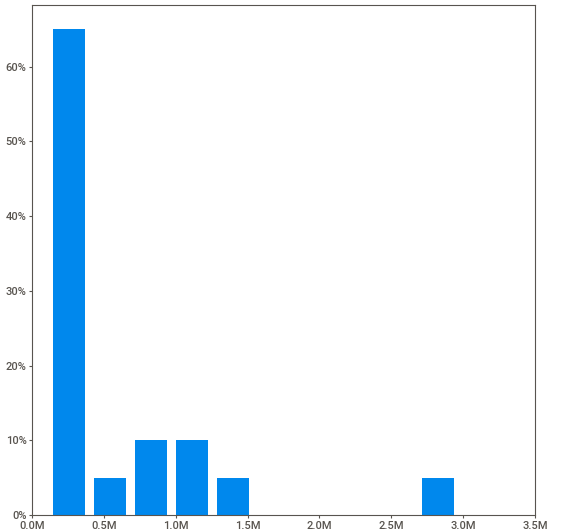
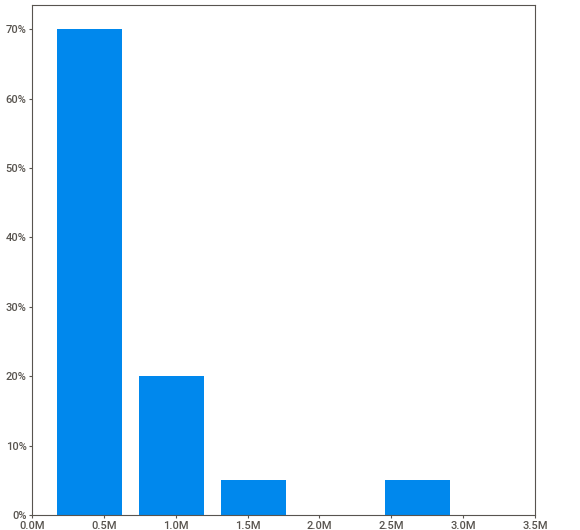
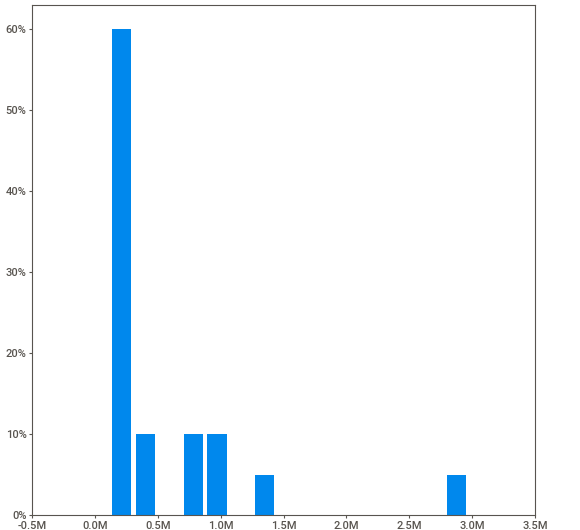
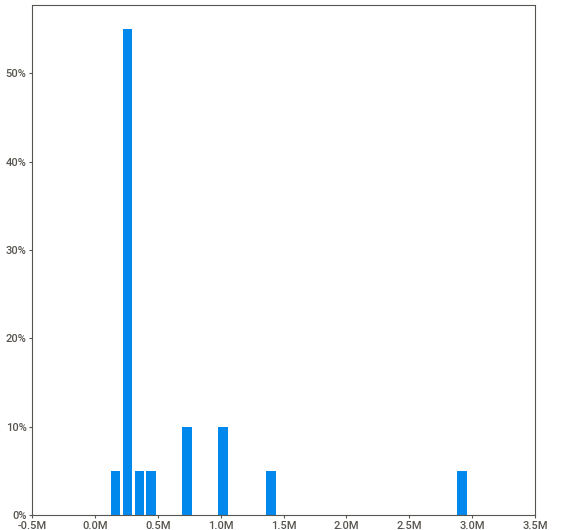
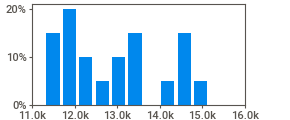
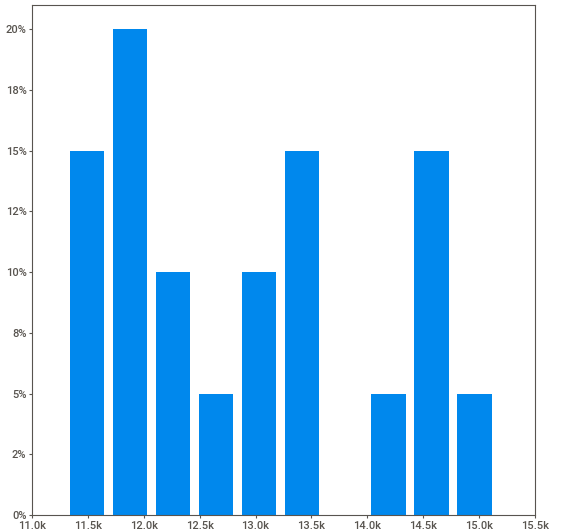
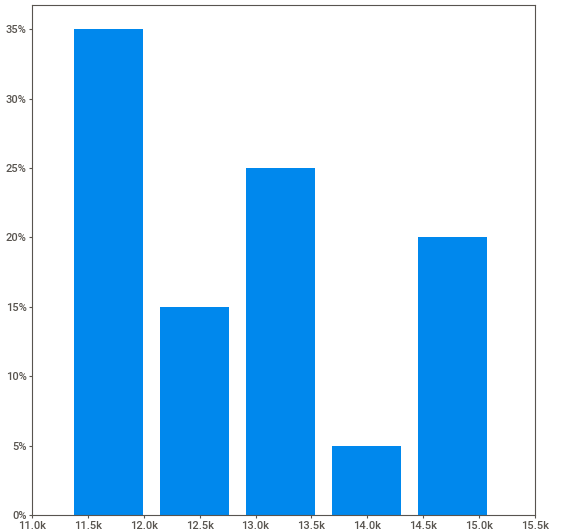
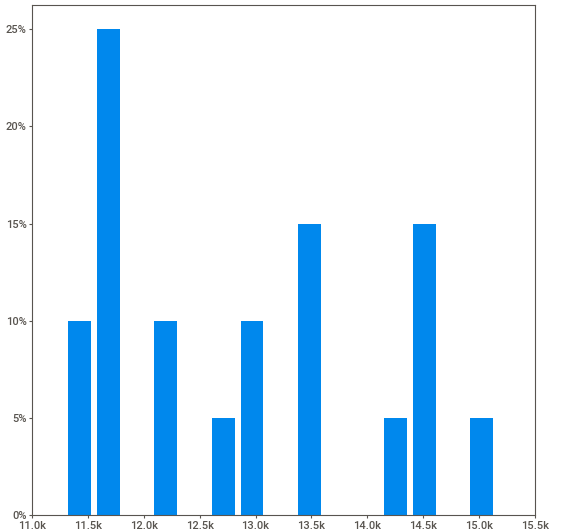
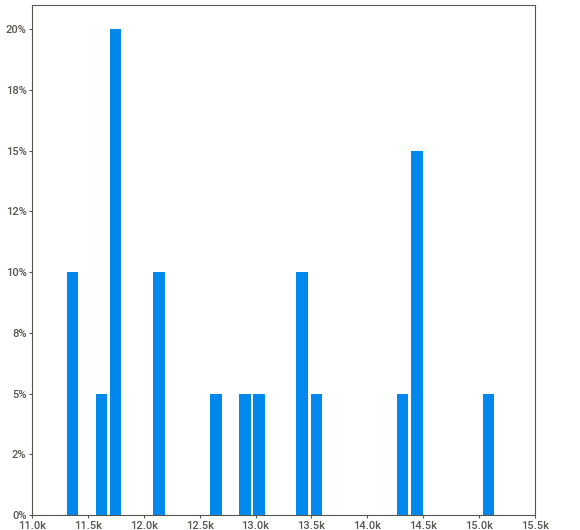
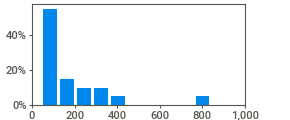
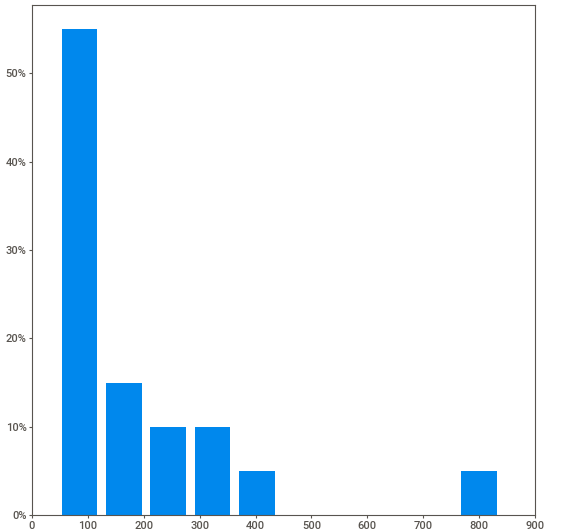
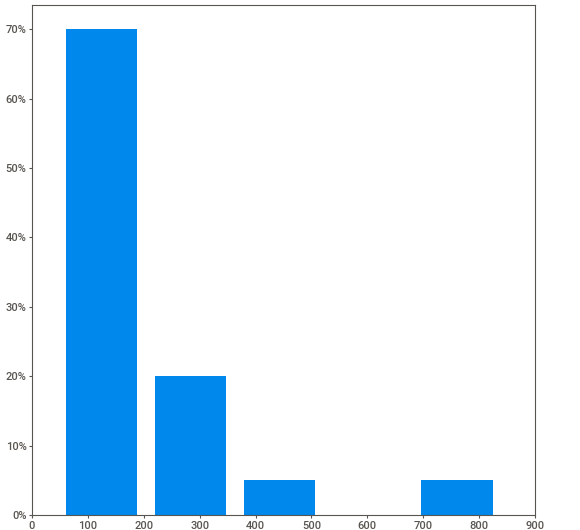
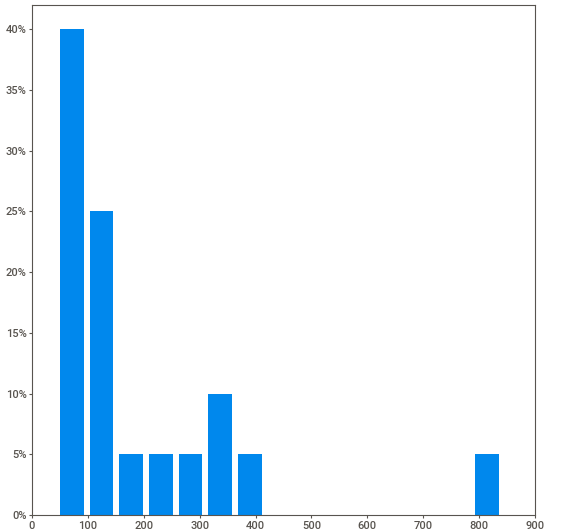
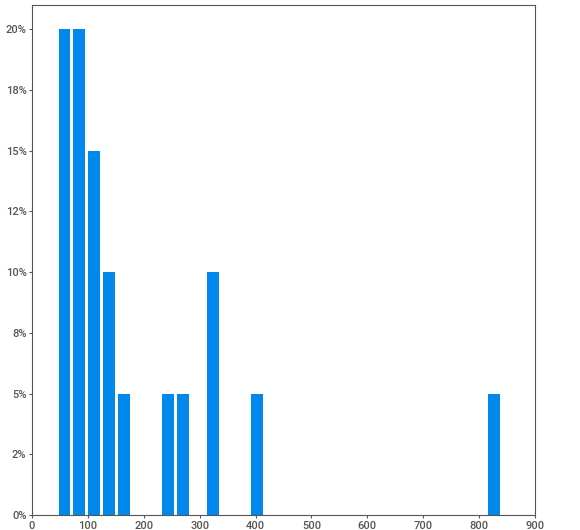
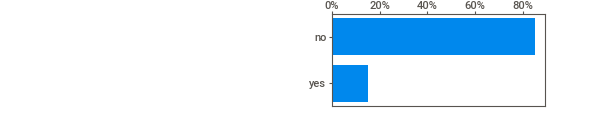
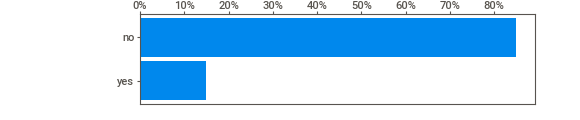
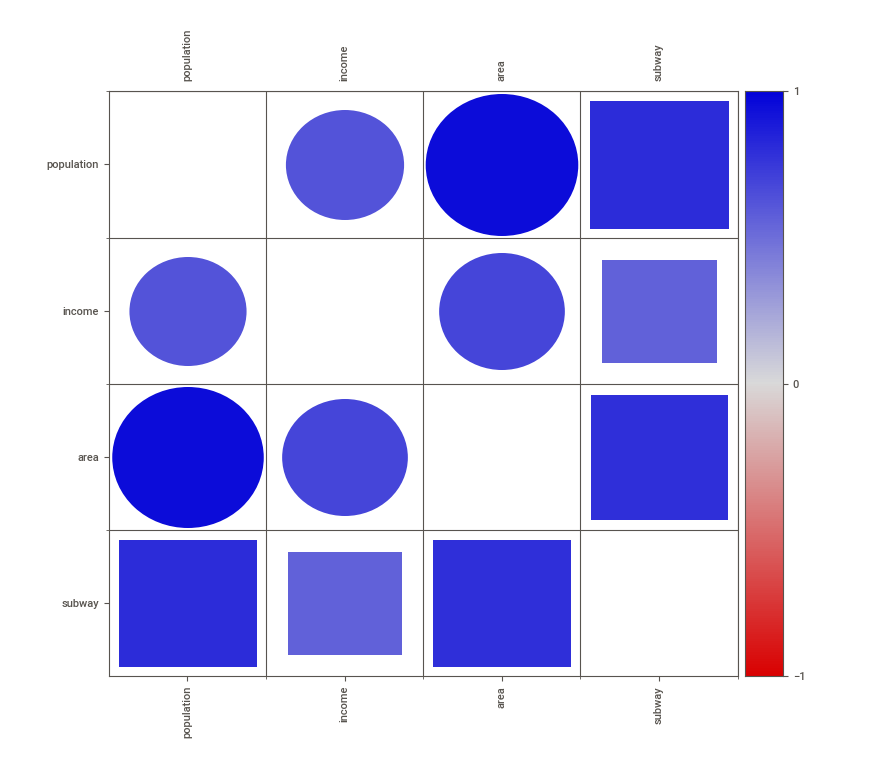
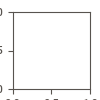

In [56]:
result = sv.analyze(df)
print('Sweetviz')
result.show_notebook()

### Порівняння звітів Profiling та Sweetviz ###

Порівнявши звіти Sweetviz та Pandas Profiling, зазначимо, що бібліотека Sweetviz пропонує більш зручний та зрозумілий інтерфейс для аналізу даних, а також більш зручні можливості для вивчення та представлення даних, зокрема щодо побудови графіків та аналізу залежностей між показниками. 
У той же час, бібліотека Pandas Profiling пропонує більш глибокий та детальний аналіз даних і видає більш детальну інформацію про дані на виході. Це стосується і можливостей щодо побудови графіків та аналізу залежностей, зокрема аналізуються пропущені та нульові значення даних, будується числова матриця кореляції і т.п.

***Отже, незважаючи на те, що Sweetviz має більш зрозумілий інтерфейс для аналізу даних, на мою думку, більш практичним видається Pandas Profiling, який пропонує більш детальний  аналіз даних.***